In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files_folder = "E:\\ASAP PhD Project\\TESTS\\FILES\\S_10"
results_folder = "E:\\ASAP PhD Project\\TESTS\\RESULTS\\S_10"
results_folder_AV = "E:\\ASAP PhD Project\\TESTS\\RESULTS\\S_10_AV"

In [3]:
# Function to process results files
def process_file(file, folder):
    data = {}
    with open(os.path.join(folder, file), "r") as f:
        for line in f:
            match = re.match(r"(\w+)\s*=\s*(.+);", line)
            if match:
                key, value = match.groups()
                data[key] = value
        return data

In [4]:
def find_time_elapsed(file, folder, regex):
    time_elapsed_values = []
    with open(os.path.join(folder, file), "r") as f:
        file_content = f.read()

    time_elapsed_values = re.findall(regex, file_content)

    return time_elapsed_values[-1] if time_elapsed_values else ""

In [5]:
def collect_data(files_folder, results_folder):
    table_data = {}
    # Fájlok beolvasása
    files = os.listdir(files_folder) + os.listdir(results_folder)

    # Adatok feldolgozása és táblázat feltöltése
    for file in files:
        file_name, file_ext = os.path.splitext(file)  # Split filename and extension
        if file_ext == ".dzn":
            file_data = process_file(file, files_folder) 
            #file_data["Filename"] = file_name
            #table_data.append(file_data)
            table_data[file_name] = file_data
        elif file_ext == ".txt":
            results_data = process_file(file, results_folder)
            table_data[file_name] = {**table_data.get(file_name, {}), **results_data}  # Merge dictionaries

            regex = r"% time elapsed: (\d+\.\d+) s\n-{10}"
            table_data[file_name]["time_best"] = find_time_elapsed(file, results_folder, regex)
            final_regex = r"={10}\n% time elapsed: (\d+\.\d+) s"
            table_data[file_name]["time_final"] = find_time_elapsed(file, results_folder, final_regex)
    return table_data

In [6]:
def table_2_df(table_data):
    df = pd.DataFrame(table_data)
    #df.columns = list(df.iloc[0].keys())
    df.columns = sorted(df.columns)

    df = df.fillna("")
    df = df.T
    return df

In [7]:
def times_2_num(df):
    df["time_best"] = pd.to_numeric(df["time_best"], errors='coerce')
    df["time_final"] = pd.to_numeric(df["time_final"], errors='coerce')
    #df["time_best"].max()
    return df

In [10]:
table_S_10 = collect_data(files_folder, results_folder)
df_S_10 = times_2_num(table_2_df(table_S_10))

table_S_10_AV = collect_data(files_folder, results_folder_AV)
df_S_10_AV = times_2_num(table_2_df(table_S_10_AV))

In [9]:
df_S_10.iloc[0].keys()

Index(['StudentsNr', 'InstructorsNr', 'DaysNr', 'SlotsPerDay',
       'AvailabilitySlotsLenght', 'RoomNr', 'ProgrammNr', 'DegreeNr',
       'RolesNr', 'CoursesNr', 'InstructorsProgramm',
       'InstructorRolesPerProgramm', 'InstructorsAvailability',
       'StudentsProgramm', 'StudentsDegree', 'StudentsSupervisorId',
       'StudentsCourseIds', 'StudentsAvailability', 'TheoryticalMinCard',
       'CoursesInstructorIds', 'RolesDemands', 'RolesContinuity', 'ExamLen',
       'LunchTsMinLen', 'LunchStarts', 'SupervisorAvailable',
       'OptimalLunchLenght', 'OptimalStartTs', 'OptimalFinishTs',
       'MinimizeRooms', 'RolesSoftContinuity', 'SameDegreeInRoom',
       'Mergeability', 'time_best', 'time_final', 'StartTs', 'RoomSchedule',
       'InstructorSchedule', 'RolesSchedule', 'ExaminersSchedule',
       'LunchStartTs', 'LunchLen', 'optimal_lunch_len', 'optimal_start_ts',
       'optimal_finish_ts', 'minimize_rooms', 'roles_soft_continuity',
       'same_degree_in_room', 'mergeability

In [11]:
df_S_10["time_best"].max()

3600.77

In [12]:
df_S_10_AV["time_best"].max()

1501.33

In [13]:
def collect_times_notna(df):
    time_best = df[df["time_best"].notna()]
    return time_best[["time_best","time_final"]]

In [14]:
df_rendezve = df_S_10_AV.sort_values(by="time_best", ascending=False)

# Első 10 sor kiválasztása
df_legjobbak = df_rendezve.head(10)

# "time_best" oszlop kiválasztása
legjobb_ertekek = df_legjobbak["time_best"]

print(f"A 10 legnagyobb érték: {legjobb_ertekek.tolist()}")

A 10 legnagyobb érték: [1501.33, 1436.57, 1425.61, 1397.67, 1363.71, 1306.98, 1210.19, 1193.88, 1187.23, 1177.27]


In [15]:
def plot_times(data):
    plt.figure(figsize=(8, 6))  # Ábrázolási terület mérete
    plt.scatter(data["time_best"], data["time_final"], alpha=0.5)  # Pontdiagram létrehozása
    plt.xlabel("time_best")  # X tengely címkéje
    plt.ylabel("time_final")  # Y tengely címkéje
    plt.title("best times")  # Cím
    plt.grid(False)  # Rács megjelenítése
    plt.show()  # Ábra megjelenítése

In [16]:
def plot_hist_time(time_data):
    
    plt.figure(figsize=(18, 10))  # Ábrázolási terület mérete
    plt.hist(time_data, bins=100)  # Oszloprendiagram létrehozása

    plt.show()  # Ábra megjelenítése

In [17]:
data_S_10 = collect_times_notna(df_S_10)
data_S_10_AV = collect_times_notna(df_S_10_AV)

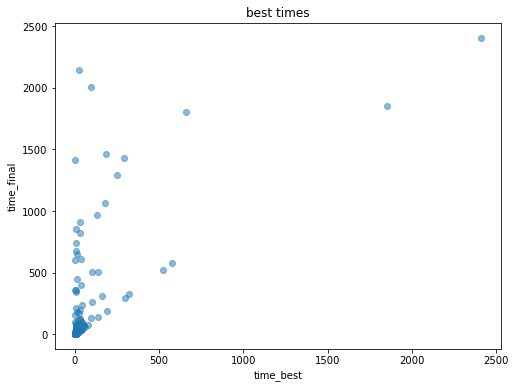

In [22]:
plot_times(data_S_10)

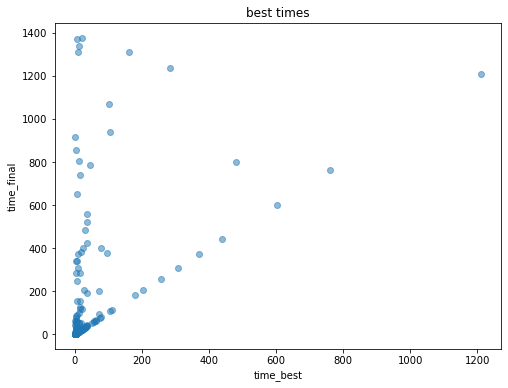

In [19]:
plot_times(data_S_10_AV)

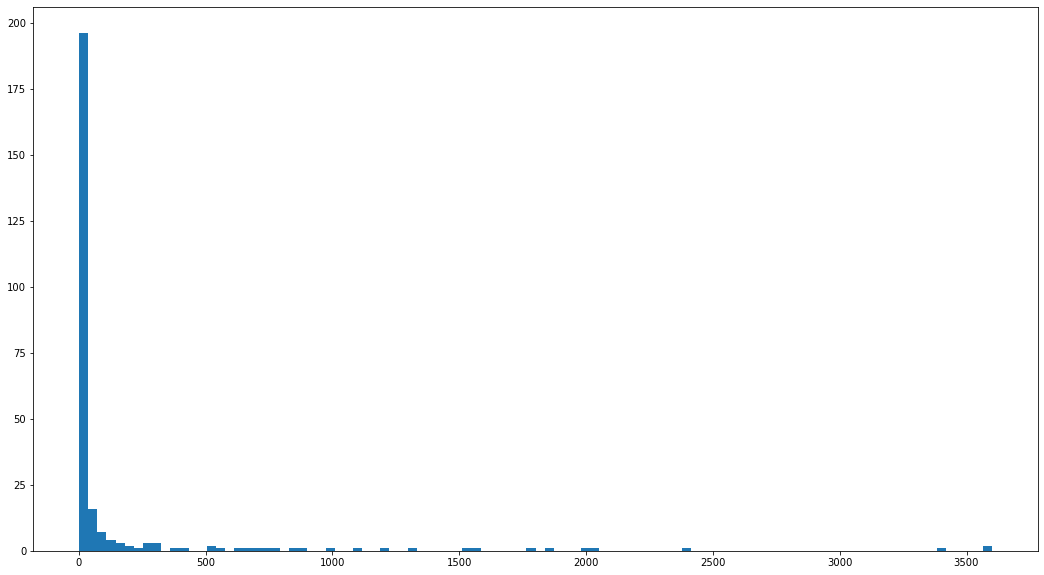

In [23]:
plot_hist_time(data_S_10["time_best"])

In [24]:
data_S_10.describe()

,time_best,time_final
count,261.000000,224.000000
mean,163.701226,151.123795
std,508.620030,384.836000
min,1.140000,1.150000
25%,4.520000,4.802500
50%,9.510000,11.520000
75%,36.570000,50.587500
max,3600.770000,2408.840000


In [25]:
data_S_10_AV.describe()

,time_best,time_final
count,322.000000,257.000000
mean,107.398540,118.239767
std,276.065204,272.831681
min,1.030000,1.030000
25%,4.620000,4.800000
50%,9.485000,10.940000
75%,33.120000,53.190000
max,1501.330000,1378.130000


In [ ]:
df.to_excel("data_AV.xlsx", index=True)

In [ ]:
# Function to handle list/set values
def handle_value(value):
    if value.startswith("[") and value.endswith("]"):  # List-like value
        return [int(x) for x in value.strip("[]").split(",")]  # Convert to int if numbers
    elif value.startswith("{") and value.endswith("}"):  # Set-like value
        return set([int(x) for x in value.strip("{}").split(",")])  # Convert to int if numbers
    else:
        return value  # Keep other values as strings

In [ ]:
# Fájlok beolvasása
files = os.listdir(files_folder) + os.listdir(results_folder)

In [ ]:
# Táblázat inicializálása
table_data = {}

# Adatok feldolgozása és táblázat feltöltése
for file in files:
    file_name, file_ext = os.path.splitext(file)  # Split filename and extension
    if file_ext == ".dzn":
        file_data = process_file(file, files_folder) 
        #file_data["Filename"] = file_name
        #table_data.append(file_data)
        table_data[file_name] = file_data
    elif file_ext == ".txt":
        results_data = process_file(file, results_folder)
        table_data[file_name] = {**table_data.get(file_name, {}), **results_data}  # Merge dictionaries
        
        regex = r"% time elapsed: (\d+\.\d+) s\n-{10}"
        table_data[file_name]["time_best"] = find_time_elapsed(file, results_folder, regex)
        final_regex = r"={10}\n% time elapsed: (\d+\.\d+) s"
        table_data[file_name]["time_final"] = find_time_elapsed(file, results_folder, final_regex)


In [ ]:
df = pd.DataFrame(table_data)
#df.columns = list(df.iloc[0].keys())
df.columns = sorted(df.columns)

df = df.fillna("")
df = df.T

In [ ]:
time_best = df[df["time_best"].notna()]
data = time_best[["time_best","time_final"]]
data